In [3]:
import pandas as pd

After importing Pandas library we will import the CSV file and call it **spending**

In [4]:
spending = pd.read_csv('dsbase.csv')

In [5]:
spending.head(n=21)

,CID,GENDER,AGE,SPEND
0,0,MALE,22,253.634165
1,1,FEMALE,28,201.438190
2,2,MALE,29,160.000000
3,3,MALE,28,161.207419
4,4,MALE,21,160.000000
5,5,MALE,29,315.736724
6,6,FEMALE,25,245.142347
7,7,FEMALE,28,236.169459
8,8,FEMALE,29,199.851566
9,9,FEMALE,21,210.433502


Here we notice that the **CID coloum** is just counting the rows the CSV file has and therefore and be discarded as to not interfere with later statistical analysis and information.
We also notice that there are **Nan** variables in our data set.

In [6]:
spending.drop('CID' , axis=1 , inplace=True)

In [7]:
spending.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 3 columns):
GENDER    98774 non-null object
AGE       100000 non-null int64
SPEND     98768 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.3+ MB


In [8]:
spending['AGE'].max()

899

A age of 899 could not be possible. Perhaps there are other data entries like this that should be discarded

In [9]:
spending['AGE'].min()

0

This ** 0 AGE** warrents a further investigation as to the validity of all the data information

In [10]:
spending[spending['AGE']==spending['AGE'].min()]

,GENDER,AGE,SPEND
673,FEMALE,0,172.784012
1018,FEMALE,0,228.036422
3605,FEMALE,0,170.277814
5348,MALE,0,160.000000
5642,MALE,0,205.464278
5702,FEMALE,0,187.251818
10109,FEMALE,0,245.024898
11587,MALE,0,160.000000
11820,MALE,0,344.239134
12448,FEMALE,0,217.676867


Being 0 years of age but still have a value under *SPEND* seems highly unlikely. Data like this should be discarded

In [11]:
spending[spending['AGE'] > 30 ]

,GENDER,AGE,SPEND
10997,FEMALE,384,1698.583319
17923,MALE,201,948.649269
32810,FEMALE,741,3056.745376
33862,MALE,336,1550.561908
44517,FEMALE,404,1726.829656
53588,FEMALE,899,3724.453092
60767,FEMALE,380,1622.147598
62129,NaN,471,1995.304900
78156,FEMALE,422,1781.677352
78209,FEMALE,277,1209.037406


Upon further investigate of the data regarding all those above the **AGE** of 30 yields strange results as well, this kind of information should be disregarded as well

In [12]:
spending = spending[(spending['AGE'] < 30) & (spending['AGE'] >= 20) & (spending['SPEND'] >0)]

I have redefined the above to only regard data from the CSV file where persons are **below** 30 , **above** 20 and have a spending of **greater than** 0


I have done this to reduce the likelyhood of "outlier/incorrect" data skewering the result of the data analysis

In [22]:
spending.describe()

,AGE,SPEND
count,98658.000000,98658.000000
mean,24.501612,210.642687
std,2.869019,44.932235
min,20.000000,64.016263
25%,22.000000,176.050373
50%,25.000000,205.891182
75%,27.000000,234.493189
max,29.000000,536.608335


In [23]:
spending.isnull().sum()

GENDER    1208
AGE          0
SPEND        0
dtype: int64

At this stage of the analysis I do not think it is nessisary to remove the *1208* null entries under **GENDER**

I maintain this because the analysis I am conducting today has not been specific about wether the product or service is markeded towards MEN or WOMEN and seeing that in South Africa the population distrubution between MEN and WOMEN is usually around 1% , I do not think its nessesary do differentiate from MEN and WOMEN at this stage 

In [13]:
def age_range(start, end):
    return spending[(spending['AGE'] >= start) & (spending['AGE'] < end)]

In [14]:
early_twenties = age_range(20, 24)

In [15]:
mid_twenties = age_range(24, 27)

In [16]:
late_twenties = age_range(27, 30)

splitting the data up into 3 age ranges

In [17]:
early_twenties.describe()

,AGE,SPEND
count,39469.000000,39469.000000
mean,21.506701,200.103244
std,1.117654,42.316360
min,20.000000,64.016263
25%,21.000000,165.099684
50%,22.000000,193.962651
75%,23.000000,221.203348
max,23.000000,515.625007


In [18]:
mid_twenties.describe()

,AGE,SPEND
count,29664.000000,29664.000000
mean,25.001955,212.214667
std,0.815558,43.892853
min,24.000000,99.677607
25%,24.000000,179.850469
50%,25.000000,208.316818
75%,26.000000,234.924053
max,26.000000,482.144118


In [19]:
late_twenties.describe()

,AGE,SPEND
count,29525.000000,29525.000000
mean,28.002506,223.152426
std,0.817515,45.928470
min,27.000000,98.726216
25%,27.000000,191.701760
50%,28.000000,220.227698
75%,29.000000,247.501676
max,29.000000,536.608335


In [20]:
def format_percentage(num):
    return ('%.5f' % num) + '%'

In [21]:
print(format_percentage(early_twenties['SPEND'].sum() / spending['SPEND'].sum() *100))

38.00420%


In [22]:
print(format_percentage(mid_twenties['SPEND'].sum() / spending['SPEND'].sum() *100))

30.29189%


In [23]:
print(format_percentage(late_twenties['SPEND'].sum() / spending['SPEND'].sum() *100))

31.70391%


from In[34] to In[36] I have worked out the percentages of each age range in terms of their share of the total **SPEND**


From this we can see that the early twenties age group *20,21,22,23* have the largest share of the total **SPEND** at 38%

Followed by late twenties at 31.70% and closely followed by late mid at 30.29%

In [26]:
print(format_percentage(early_twenties[early_twenties.GENDER == 'FEMALE']['SPEND'].sum() / spending['SPEND'].sum() *100))

21.89651%


In [27]:
print(format_percentage(early_twenties[early_twenties.GENDER == 'MALE']['SPEND'].sum() / spending['SPEND'].sum() *100))

15.61775%


the Above 2 percentages show the percentage of female/male spendering from the early twenties catagory compared against the total spending.

I will now how each sub catagory of female/male sending per age grouping.

In [28]:
print(format_percentage(mid_twenties[mid_twenties.GENDER == 'FEMALE']['SPEND'].sum() / spending['SPEND'].sum() *100))

17.85389%


In [29]:
print(format_percentage(mid_twenties[mid_twenties.GENDER == 'MALE']['SPEND'].sum() / spending['SPEND'].sum() *100))

12.04456%


above is the percentage calculations for the mid twenties age range

In [30]:
print(format_percentage(late_twenties[late_twenties.GENDER == 'FEMALE']['SPEND'].sum() / spending['SPEND'].sum() *100))

18.74756%


In [31]:
print(format_percentage(late_twenties[late_twenties.GENDER == 'MALE']['SPEND'].sum() / spending['SPEND'].sum() *100))

12.56399%


above is the percentage calculations for the late twenties age range

From this analysis we can see that FEMALE's in their *early twenties* spend the most in the data set with 21.89% of the total share

next we see FEMALE's in their late twenties are second to **SPEND** the most at 18.74%, this is followed by MALE's in the mid twenties spending the third most at 17.85%

Next I will import numpy to run a linear regression on the Data set to create a a function that will predict the average amount **SPENT** by each age and **NOT** each age catagory 

In [33]:
import numpy as np

In [34]:
regression = np.polyfit(spending['AGE'], spending['SPEND'], 1)

In [35]:
spend_predictor = np.poly1d(regression)

Next I will demonstrate how the spend predictor will work by calculate the "predicted spend" per age
I will domstrate this by calculate the linear regression applied to 3 ages: 21, 25, 29

In [36]:
spend_predictor(21)

198.27669488952756

In [37]:
spend_predictor(25)

212.4027524760418

In [47]:
spend_predictor(29)

226.528810062556

Next I will plot my linear regression

Text(0.5,1,'Predictive Model')

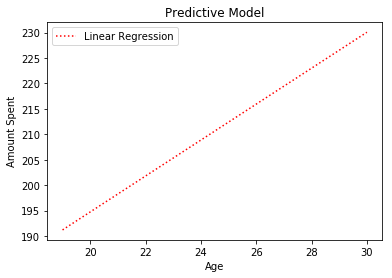

In [65]:
import matplotlib.pyplot as plt
plt.figure()

plot_x = np.linspace(19, 30)
plot_y = regression[0] * plot_x + regression[1]
plt.plot(plot_x, plot_y, ':r' , label='Linear Regression')
plt.ylabel('Amount Spent')
plt.xlabel('Age')
plt.legend()
plt.title("Predictive Model")